In [1]:
#Preprocessing
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
import h5py
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib_venn import venn3, venn3_circles
import pickle
import gzip
import pandas as pd
import requests
import openslide
from openslide.deepzoom import DeepZoomGenerator
from openslide import open_slide
import math
import pdb
import time
import os
import matplotlib.patches as mpatches

In [7]:
from keras.models import Sequential, Model
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input, Dense
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

In [2]:
tissue_types = ['Lung', 'Artery - Tibial', 'Heart - Left Ventricle', 'Breast - Mammary Tissue', 'Brain - Cerebellum', 'Pancreas', 'Testis', 'Liver', 'Ovary', 'Stomach']
genotypes_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/GenotypeFiles/phg000520.v2.GTEx_MidPoint_Imputation.genotype-calls-vcf.c1/parse_data/GTEx_Analysis_20150112_OMNI_2.5M_5M_450Indiv_chr1to22_genot_imput_info04_maf01_HWEp1E6_ConstrVarIDs_all_chrom_filered_maf_subset_individuals_44_tissues.hdf5'
expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_*_normalised_without_inverse_gene_expression.txt'
phenotype_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002743.v6.p1.c1.GTEx_Sample_Attributes.GRU.txt.gz'

def build_empty_model():
    inception_model = InceptionV3(weights='imagenet', include_top=False)
    x = inception_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(input=inception_model.input, output=predictions)
    return model

In [3]:
data_tile_number = 10
data_tile_level_index = -1
raw_X = []
tissue_labels = []
IDs = []
for t in tissue_types:
    print (t)
    [rX, tl, ID] = pickle.load(open('../data/processed/patches/data_{}_{}_{}.py'.format(t,data_tile_number,data_tile_level_index), 'rb'))
    raw_X.extend(rX)
    tissue_labels.extend(tl)
    IDs.extend(ID)
X = np.array(raw_X)

Lung
Artery - Tibial
Heart - Left Ventricle
Breast - Mammary Tissue
Brain - Cerebellum
Pancreas
Testis
Liver
Ovary
Stomach


In [6]:
%matplotlib inline

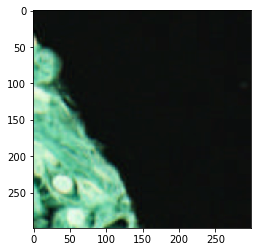

In [29]:
plt.imshow(X[24].astype(np.float32))

In [31]:
model_tile_number = 50
model_tile_level_index = -1


In [8]:
# Generate from scratch
model = build_empty_model()
model.load_weights('../models/inception_50_-1_gs1.h5')

final_layer_model = Model(model.input, model.layers[-2].output)
full_representations = final_layer_model.predict(X)

pickle.dump(full_representations,open('../data/processed/representations/representations_model_{}_{}_gs{}_data_{}_{}_check'.format(model_tile_number,model_tile_level_index,1,data_tile_number,data_tile_level_index), 'wb'))


In [33]:
full_representations = pickle.load(open('../data/processed/representations/representations_model_{}_{}_gs{}_data_{}_{}'.format(model_tile_number,model_tile_level_index,1,data_tile_number,data_tile_level_index), 'rb'))